# Cancer Data set
https://www.kaggle.com/code/lbronchal/breast-cancer-dataset-analysis/data

This data set has 32 features and 570 samples. Luckily for us there are no missing values in this data set, and there is one categorical variable that is the diagnosis.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
from scipy import stats as stat
from sklearn import preprocessing as sklpp


In [ ]:
df =pd.read_csv("Cancer_data.csv")
df.head()
#df.shape

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#Pre-processing 
step 1: get rid of any unwanted column in our case we got rid of id and Unnamed: 32. The reason we did this is because these are string values that we can not use to predict the genre.

step 2: Now that we have the samples of data we want we need to make sure that they can work with PCA inorder to do this we need to label encode the predictions of the cancer using sklearn's preprocessing function.

step 3: Now PCA can be applied for this data set we used 2 principal components 

Once PCA is done we graph the solution and find out that there is good separation between the data. 


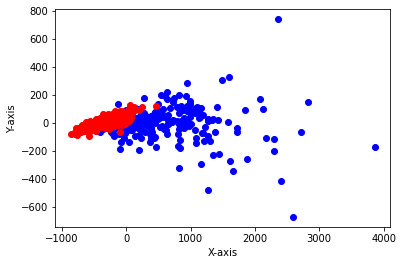

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
df =pd.read_csv("Cancer_data.csv")

label_encoder = preprocessing.LabelEncoder()
df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])

df.drop(columns = 'id', inplace=True) # thses are the collums that we will not use for our data
df.drop(columns ='Unnamed: 32', inplace=True)
df.head()

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)

M = finalDf.loc[finalDf['diagnosis'] == 1]
B = finalDf.loc[finalDf['diagnosis'] == 0]

 
plt.scatter(M.loc[:,'principal component 1'], M.loc[:,'principal component 2'], c ="blue")
plt.scatter(B.loc[:,'principal component 1'], B.loc[:,'principal component 2'], c ="red")


plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


# Splitting the data
Here we are using the sklearn method train_test_split in order to split our data to get our test and training data.

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training, validation, and test sets
train_data, val_and_test_data = train_test_split(finalDf, test_size=0.3)

# Split the validation and test sets further
val_data, test_data = train_test_split(val_and_test_data, test_size=0.5)

print(train_data.shape)  
print(val_data.shape)    
print(test_data.shape)  


(398, 3)
(85, 3)
(86, 3)


#Model 1: LDA
Now finally we can use our machine learning method LDA. Here we are using sklearns LinearDiscriminantAnalysis to fit the model and predict the test data, as well as the confusion_matrix method to graph the confusion_matrix. Here we also do the Cross validation over 10 splits and get 0.8744.

cross validation:  0.8717307692307692


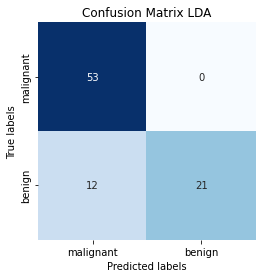

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Training data
X = train_data[['principal component 1','principal component 2']]
y = train_data['diagnosis']
# Test data
X_test = test_data[['principal component 1','principal component 2']]

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

#Define method for CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)

#evaluate CV and get mean score
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('cross validation: ', np.mean(scores))   

#predict which class the new observation belongs to
predictions_lda = model.predict(X_test)
actual_val = np.array(test_data.loc[:,"diagnosis"])

# Graphing the confusion matrix
ax= plt.subplot()
conf_mat = confusion_matrix(actual_val, predictions_lda)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False,ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix LDA'); 
ax.xaxis.set_ticklabels(['malignant','benign']); ax.yaxis.set_ticklabels(['malignant','benign']);


# Model 2: Naive Bayes
Here we use the GaussionNB method from sklearn to fit the training data and use that to predict the Test data. Then we plot our findings on the Confusion matrix

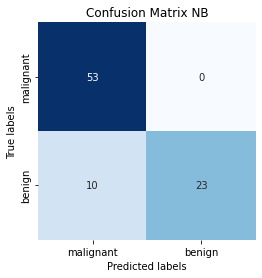

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X, y)

y_pred  =  classifier.predict(X_test)

# Graphing the confusion matrix
ax= plt.subplot()
conf_mat = confusion_matrix(actual_val, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False,ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix NB'); 
ax.xaxis.set_ticklabels(['malignant','benign']); ax.yaxis.set_ticklabels(['malignant','benign']);

#Comparative analysis
As can be seen by the confusion matrix lda is better at predicting the malignant tumors. However, Naive Bayes is better at predicting the benign tumors. Because of this I think that Naive Bayes is a better classifier because of how it predicts the highest True positives and True Negatives.

#Ethical Issues
When trying to predict something like cancer it is important to make sure that your prediction is correct. In our model most of the time there will be a correct value but there are some times that the model has a wrong prediction. If our Model were to predict the diagnosis incorrectly which could lead to wrong treatment that could put the patient at risk. Because of this it is our job to be transparent with our end consumer and let them know that this machine learning model will not always be correct. 

# Bibliography
[1] [LDA](https://www.statology.org/linear-discriminant-analysis-in-python/)

[2] [Naive Bayes](https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/)

[3][Confussion matrix](https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=What%20is%20a%20confusion%20matrix,the%20predictions%20we%20have%20made.)